In [1]:
import pandas as pd
import altair as alt

alt.themes.enable('opaque')

ThemeRegistry.enable('opaque')

In [2]:
position = 'WR'
week = '1'
PATH = 'data/week' + week + '/' + position + '/'

In [33]:
df = pd.read_csv(PATH + position + '.csv')
df.head()

,Player,Team,Games,Targets,Receptions,ReceivingYards,ReceivingTD,Attempts,RushingYards,RushingTD,FantasyPoints,FantasyPointsPerGame
0,Sammy Watkins,KC,1,11,9,198,3,0,0,0,42.3,42.3
1,Michael Gallup,DAL,1,7,7,158,0,0,0,0,19.3,19.3
2,John Ross,CIN,1,12,7,158,2,0,0,0,31.3,31.3
3,DeSean Jackson,PHI,1,10,8,154,2,0,0,0,31.4,31.4
4,Marquise Brown,BAL,1,5,4,147,2,0,0,0,28.7,28.7


In [34]:
data = df[['Player', 'Team', 'Targets', 'Receptions', 'ReceivingYards', 'FantasyPoints']].copy()

In [35]:
# Create sorted list of teams in dataframe
# Data is defined below, above charts
teams = sorted((data['Team'].unique()))
teams[:5]

['ARI', 'ATL', 'BAL', 'BUF', 'CAR']

In [36]:
# Create list of all 32 teams
all_teams = ['ARI', 'ATL', 'BAL', 'BUF',
             'CAR', 'CHI', 'CIN', 'CLE',
             'DAL', 'DEN', 'DET', 'GB',
             'HOU', 'IND', 'JAC', 'KC', 
             'LAC', 'LAR', 'MIA', 'MIN', 
             'NE', 'NO', 'NYG', 'NYJ', 
             'OAK', 'PHI', 'PIT', 'SEA',
             'SF', 'TB', 'TEN', 'WAS']

In [37]:
# Sometimes a team can be missing, find which ones
[team for team in all_teams if team not in teams]

['SF']

In [38]:
# Create list of team colors, comment colors for missing teams
color_codes = [
    '#97233F', #ARI
    '#A71930', #ATL
    '#241773', #BAL
    '#00338D', #BUF
    '#0085CA', #CAR
    '#C83803', #CHI
    '#FB4F14', #CIN
    '#311D00', #CLE
    '#869397', #DAL
    '#FB4F14', #DEN
    '#0076B6', #DET
    '#203731', #GB
    '#03202F', #HOU
    '#002C5F', #IND
    '#006778', #JAC
    '#E31837', #KC
    '#FFC20E', #LAC
    '#866D4B', #LAR
    '#FC4C02', #MIA
    '#4F2683', #MIN
    '#002244', #NE
    '#D3BC8D', #NO
    '#0B2265', #NYG
    '#125740', #NYJ
    '#000000', #OAK
    '#004C54', #PHI
    '#FFB612', #PIT
    '#69BE28', #SEA
    # '#AA0000', #SF
    '#D50A0A', #TB
    '#418FDE', #TEN
    '#773141' #WAS
]

## Fantasy Points

In [43]:
data = df[['Player', 'Team', 'FantasyPoints']].copy()

In [44]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'FantasyPoints:Q',
        axis = alt.Axis(title = 'Fantasy Points')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'FantasyPoints',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    ),
    color = alt.Color(
        'Team:N',
        scale = alt.Scale(
            domain = teams,
            range = color_codes        
        )
    )
).properties(title = 'Week 1: 0.5 PPR Fantasy Points by Wide Receivers')

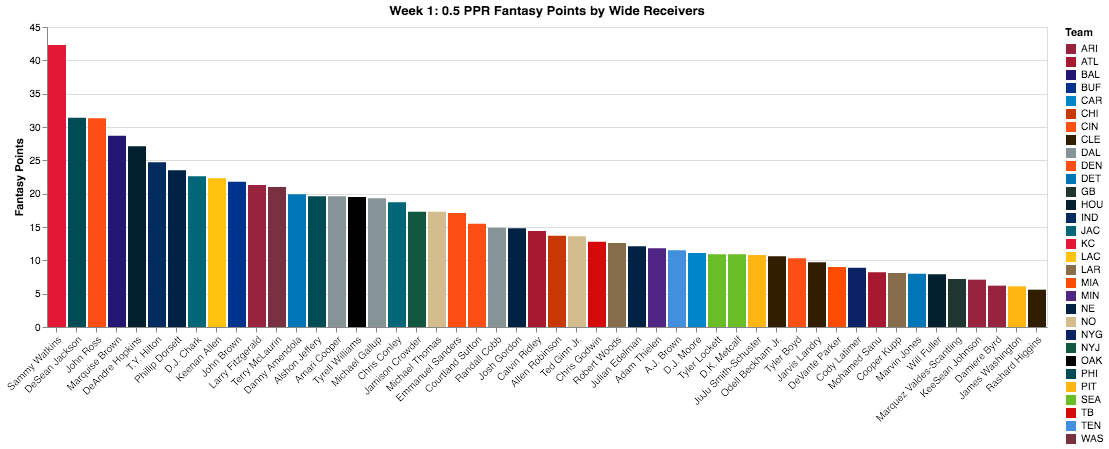

In [45]:
chart

In [46]:
chart.save(PATH + 'plots/WR_fantasypoints_color.png', scale_factor=3.0)

In [47]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'FantasyPoints:Q',
        axis = alt.Axis(title = 'Fantasy Points')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'FantasyPoints',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    )
).properties(title = 'Week 1: 0.5 PPR Fantasy Points by Wide Receivers')

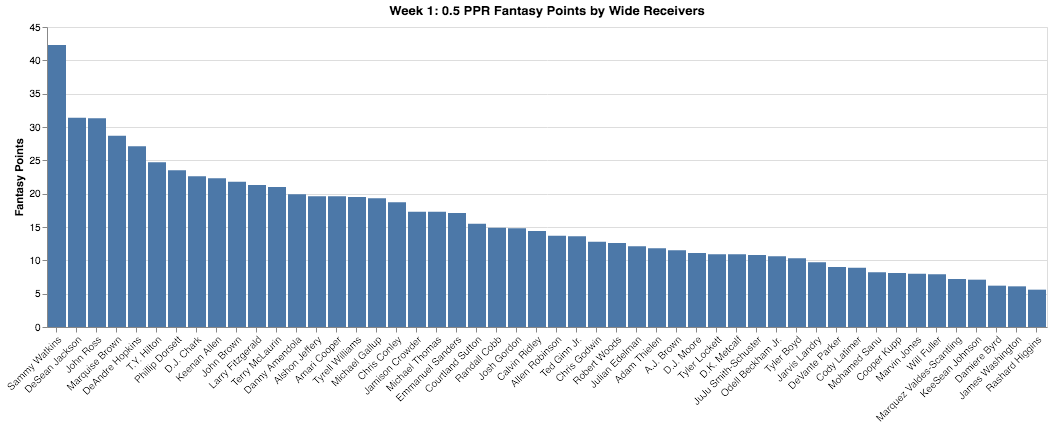

In [48]:
chart

In [49]:
chart.save(PATH + 'plots/WR_fantasypoints_plain.png', scale_factor=3.0)

## Receiving Yards

In [50]:
data = df[['Player', 'Team', 'ReceivingYards']].copy()

In [51]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'ReceivingYards:Q',
        axis = alt.Axis(title = 'Receiving Yards')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'ReceivingYards',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    ),
    color = alt.Color(
        'Team:N',
        scale = alt.Scale(
            domain = teams,
            range = color_codes        
        )
    )
).properties(title = 'Week 1: Receiving Yards by Wide Receivers (Top 50)')

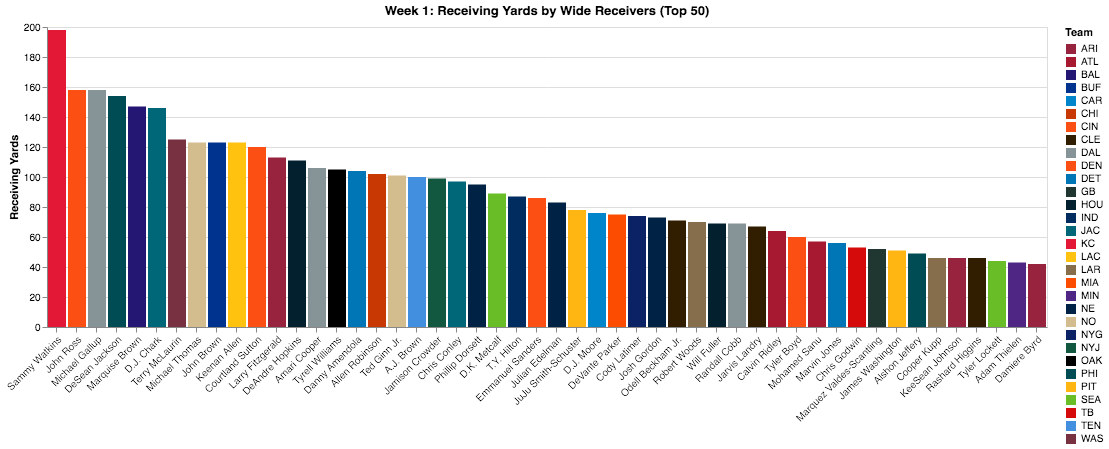

In [52]:
chart

In [53]:
chart.save(PATH + 'plots/WR_receivingyards_color.png', scale_factor=3.0)

In [54]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'ReceivingYards:Q',
        axis = alt.Axis(title = 'Receiving Yards')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'ReceivingYards',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    )
).properties(title = 'Week 1: Receiving Yards by Wide Receivers (Top 50)')

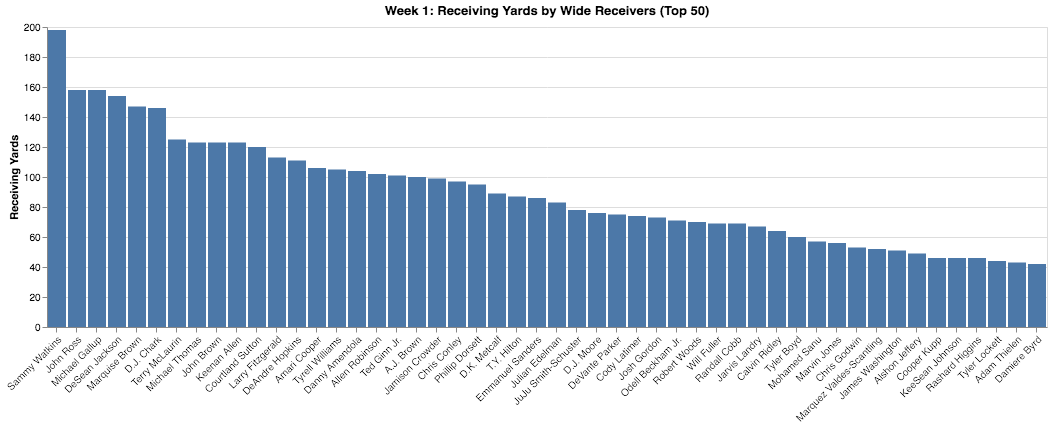

In [55]:
chart

In [56]:
chart.save(PATH + 'plots/WR_receivingyards_plain.png', scale_factor=3.0)

## Targets

## Receptions